# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 604


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
        time.sleep(30)
    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}"
    
    print(city_url)
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]['temp_max']
        city_humidity = city_weather["main"]['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
https://api.openweathermap.org/data/2.5/weather?appid=eef5323fb29bab9d14ffe3958da4da6b&q=hearst
Processing Record 1 of Set 1 | hearst
https://api.openweathermap.org/data/2.5/weather?appid=eef5323fb29bab9d14ffe3958da4da6b&q=jamestown
Processing Record 2 of Set 1 | jamestown
https://api.openweathermap.org/data/2.5/weather?appid=eef5323fb29bab9d14ffe3958da4da6b&q=mataura
Processing Record 3 of Set 1 | mataura
https://api.openweathermap.org/data/2.5/weather?appid=eef5323fb29bab9d14ffe3958da4da6b&q=sharan
Processing Record 4 of Set 1 | sharan
https://api.openweathermap.org/data/2.5/weather?appid=eef5323fb29bab9d14ffe3958da4da6b&q=bluff
Processing Record 5 of Set 1 | bluff
https://api.openweathermap.org/data/2.5/weather?appid=eef5323fb29bab9d14ffe3958da4da6b&q=nambucca heads
Processing Record 6 of Set 1 | nambucca heads
https://api.openweathermap.org/data/2.5/weather?appid=eef5323fb29bab9d14ffe3958da4da6b&q=belushya guba
Processing 

https://api.openweathermap.org/data/2.5/weather?appid=eef5323fb29bab9d14ffe3958da4da6b&q=nizhneyansk
Processing Record 7 of Set 2 | nizhneyansk
City not found. Skipping...
https://api.openweathermap.org/data/2.5/weather?appid=eef5323fb29bab9d14ffe3958da4da6b&q=coquimbo
Processing Record 8 of Set 2 | coquimbo
https://api.openweathermap.org/data/2.5/weather?appid=eef5323fb29bab9d14ffe3958da4da6b&q=kahului
Processing Record 9 of Set 2 | kahului
https://api.openweathermap.org/data/2.5/weather?appid=eef5323fb29bab9d14ffe3958da4da6b&q=eydhafushi
Processing Record 10 of Set 2 | eydhafushi
https://api.openweathermap.org/data/2.5/weather?appid=eef5323fb29bab9d14ffe3958da4da6b&q=japura
Processing Record 11 of Set 2 | japura
https://api.openweathermap.org/data/2.5/weather?appid=eef5323fb29bab9d14ffe3958da4da6b&q=sitka
Processing Record 12 of Set 2 | sitka
City not found. Skipping...
https://api.openweathermap.org/data/2.5/weather?appid=eef5323fb29bab9d14ffe3958da4da6b&q=nara
Processing Record 13 

https://api.openweathermap.org/data/2.5/weather?appid=eef5323fb29bab9d14ffe3958da4da6b&q=pevek
Processing Record 15 of Set 3 | pevek
https://api.openweathermap.org/data/2.5/weather?appid=eef5323fb29bab9d14ffe3958da4da6b&q=barentsburg
Processing Record 16 of Set 3 | barentsburg
City not found. Skipping...
https://api.openweathermap.org/data/2.5/weather?appid=eef5323fb29bab9d14ffe3958da4da6b&q=nanortalik
Processing Record 17 of Set 3 | nanortalik
https://api.openweathermap.org/data/2.5/weather?appid=eef5323fb29bab9d14ffe3958da4da6b&q=tutoia
Processing Record 18 of Set 3 | tutoia
https://api.openweathermap.org/data/2.5/weather?appid=eef5323fb29bab9d14ffe3958da4da6b&q=piacenza
Processing Record 19 of Set 3 | piacenza
https://api.openweathermap.org/data/2.5/weather?appid=eef5323fb29bab9d14ffe3958da4da6b&q=scarborough
Processing Record 20 of Set 3 | scarborough
https://api.openweathermap.org/data/2.5/weather?appid=eef5323fb29bab9d14ffe3958da4da6b&q=sao joao da barra
Processing Record 21 of S

https://api.openweathermap.org/data/2.5/weather?appid=eef5323fb29bab9d14ffe3958da4da6b&q=port alfred
Processing Record 23 of Set 4 | port alfred
https://api.openweathermap.org/data/2.5/weather?appid=eef5323fb29bab9d14ffe3958da4da6b&q=la paz
Processing Record 24 of Set 4 | la paz
https://api.openweathermap.org/data/2.5/weather?appid=eef5323fb29bab9d14ffe3958da4da6b&q=praia da vitoria
Processing Record 25 of Set 4 | praia da vitoria
https://api.openweathermap.org/data/2.5/weather?appid=eef5323fb29bab9d14ffe3958da4da6b&q=ust-tsilma
Processing Record 26 of Set 4 | ust-tsilma
https://api.openweathermap.org/data/2.5/weather?appid=eef5323fb29bab9d14ffe3958da4da6b&q=olavarria
Processing Record 27 of Set 4 | olavarria
https://api.openweathermap.org/data/2.5/weather?appid=eef5323fb29bab9d14ffe3958da4da6b&q=husavik
Processing Record 28 of Set 4 | husavik
https://api.openweathermap.org/data/2.5/weather?appid=eef5323fb29bab9d14ffe3958da4da6b&q=chabahar
Processing Record 29 of Set 4 | chabahar
https

https://api.openweathermap.org/data/2.5/weather?appid=eef5323fb29bab9d14ffe3958da4da6b&q=strathpeffer
Processing Record 32 of Set 5 | strathpeffer
https://api.openweathermap.org/data/2.5/weather?appid=eef5323fb29bab9d14ffe3958da4da6b&q=srednekolymsk
Processing Record 33 of Set 5 | srednekolymsk
https://api.openweathermap.org/data/2.5/weather?appid=eef5323fb29bab9d14ffe3958da4da6b&q=cidreira
Processing Record 34 of Set 5 | cidreira
https://api.openweathermap.org/data/2.5/weather?appid=eef5323fb29bab9d14ffe3958da4da6b&q=bengkulu
Processing Record 35 of Set 5 | bengkulu
https://api.openweathermap.org/data/2.5/weather?appid=eef5323fb29bab9d14ffe3958da4da6b&q=zonguldak
Processing Record 36 of Set 5 | zonguldak
https://api.openweathermap.org/data/2.5/weather?appid=eef5323fb29bab9d14ffe3958da4da6b&q=kargopol
Processing Record 37 of Set 5 | kargopol
https://api.openweathermap.org/data/2.5/weather?appid=eef5323fb29bab9d14ffe3958da4da6b&q=kodiak
Processing Record 38 of Set 5 | kodiak
https://api

https://api.openweathermap.org/data/2.5/weather?appid=eef5323fb29bab9d14ffe3958da4da6b&q=labutta
Processing Record 39 of Set 6 | labutta
City not found. Skipping...
https://api.openweathermap.org/data/2.5/weather?appid=eef5323fb29bab9d14ffe3958da4da6b&q=shakhtinsk
Processing Record 40 of Set 6 | shakhtinsk
https://api.openweathermap.org/data/2.5/weather?appid=eef5323fb29bab9d14ffe3958da4da6b&q=oktyabrskiy
Processing Record 41 of Set 6 | oktyabrskiy
https://api.openweathermap.org/data/2.5/weather?appid=eef5323fb29bab9d14ffe3958da4da6b&q=lethem
Processing Record 42 of Set 6 | lethem
https://api.openweathermap.org/data/2.5/weather?appid=eef5323fb29bab9d14ffe3958da4da6b&q=ahuimanu
Processing Record 43 of Set 6 | ahuimanu
https://api.openweathermap.org/data/2.5/weather?appid=eef5323fb29bab9d14ffe3958da4da6b&q=pingdingshan
Processing Record 44 of Set 6 | pingdingshan
https://api.openweathermap.org/data/2.5/weather?appid=eef5323fb29bab9d14ffe3958da4da6b&q=labytnangi
Processing Record 45 of Se

https://api.openweathermap.org/data/2.5/weather?appid=eef5323fb29bab9d14ffe3958da4da6b&q=natal
Processing Record 47 of Set 7 | natal
https://api.openweathermap.org/data/2.5/weather?appid=eef5323fb29bab9d14ffe3958da4da6b&q=am timan
Processing Record 48 of Set 7 | am timan
https://api.openweathermap.org/data/2.5/weather?appid=eef5323fb29bab9d14ffe3958da4da6b&q=grand river south east
Processing Record 49 of Set 7 | grand river south east
City not found. Skipping...
https://api.openweathermap.org/data/2.5/weather?appid=eef5323fb29bab9d14ffe3958da4da6b&q=galiwinku
Processing Record 0 of Set 8 | galiwinku
City not found. Skipping...
https://api.openweathermap.org/data/2.5/weather?appid=eef5323fb29bab9d14ffe3958da4da6b&q=progreso
Processing Record 1 of Set 8 | progreso
https://api.openweathermap.org/data/2.5/weather?appid=eef5323fb29bab9d14ffe3958da4da6b&q=yar-sale
Processing Record 2 of Set 8 | yar-sale
https://api.openweathermap.org/data/2.5/weather?appid=eef5323fb29bab9d14ffe3958da4da6b&q=

City not found. Skipping...
https://api.openweathermap.org/data/2.5/weather?appid=eef5323fb29bab9d14ffe3958da4da6b&q=yaan
Processing Record 5 of Set 9 | yaan
https://api.openweathermap.org/data/2.5/weather?appid=eef5323fb29bab9d14ffe3958da4da6b&q=inhambane
Processing Record 6 of Set 9 | inhambane
https://api.openweathermap.org/data/2.5/weather?appid=eef5323fb29bab9d14ffe3958da4da6b&q=bambanglipuro
Processing Record 7 of Set 9 | bambanglipuro
https://api.openweathermap.org/data/2.5/weather?appid=eef5323fb29bab9d14ffe3958da4da6b&q=magadan
Processing Record 8 of Set 9 | magadan
https://api.openweathermap.org/data/2.5/weather?appid=eef5323fb29bab9d14ffe3958da4da6b&q=boende
Processing Record 9 of Set 9 | boende
https://api.openweathermap.org/data/2.5/weather?appid=eef5323fb29bab9d14ffe3958da4da6b&q=novobiryusinskiy
Processing Record 10 of Set 9 | novobiryusinskiy
https://api.openweathermap.org/data/2.5/weather?appid=eef5323fb29bab9d14ffe3958da4da6b&q=kambar
Processing Record 11 of Set 9 | k

https://api.openweathermap.org/data/2.5/weather?appid=eef5323fb29bab9d14ffe3958da4da6b&q=nizhnyaya salda
Processing Record 13 of Set 10 | nizhnyaya salda
https://api.openweathermap.org/data/2.5/weather?appid=eef5323fb29bab9d14ffe3958da4da6b&q=waingapu
Processing Record 14 of Set 10 | waingapu
https://api.openweathermap.org/data/2.5/weather?appid=eef5323fb29bab9d14ffe3958da4da6b&q=nishihara
Processing Record 15 of Set 10 | nishihara
https://api.openweathermap.org/data/2.5/weather?appid=eef5323fb29bab9d14ffe3958da4da6b&q=rubiataba
Processing Record 16 of Set 10 | rubiataba
https://api.openweathermap.org/data/2.5/weather?appid=eef5323fb29bab9d14ffe3958da4da6b&q=kysyl-syr
Processing Record 17 of Set 10 | kysyl-syr
https://api.openweathermap.org/data/2.5/weather?appid=eef5323fb29bab9d14ffe3958da4da6b&q=acara
Processing Record 18 of Set 10 | acara
https://api.openweathermap.org/data/2.5/weather?appid=eef5323fb29bab9d14ffe3958da4da6b&q=upington
Processing Record 19 of Set 10 | upington
https:

https://api.openweathermap.org/data/2.5/weather?appid=eef5323fb29bab9d14ffe3958da4da6b&q=lidkoping
Processing Record 20 of Set 11 | lidkoping
https://api.openweathermap.org/data/2.5/weather?appid=eef5323fb29bab9d14ffe3958da4da6b&q=ahipara
Processing Record 21 of Set 11 | ahipara
https://api.openweathermap.org/data/2.5/weather?appid=eef5323fb29bab9d14ffe3958da4da6b&q=mehamn
Processing Record 22 of Set 11 | mehamn
https://api.openweathermap.org/data/2.5/weather?appid=eef5323fb29bab9d14ffe3958da4da6b&q=apiai
Processing Record 23 of Set 11 | apiai
https://api.openweathermap.org/data/2.5/weather?appid=eef5323fb29bab9d14ffe3958da4da6b&q=belle fourche
Processing Record 24 of Set 11 | belle fourche
https://api.openweathermap.org/data/2.5/weather?appid=eef5323fb29bab9d14ffe3958da4da6b&q=cururupu
Processing Record 25 of Set 11 | cururupu
https://api.openweathermap.org/data/2.5/weather?appid=eef5323fb29bab9d14ffe3958da4da6b&q=kosa
Processing Record 26 of Set 11 | kosa
https://api.openweathermap.o

https://api.openweathermap.org/data/2.5/weather?appid=eef5323fb29bab9d14ffe3958da4da6b&q=esso
Processing Record 28 of Set 12 | esso
https://api.openweathermap.org/data/2.5/weather?appid=eef5323fb29bab9d14ffe3958da4da6b&q=vestmanna
Processing Record 29 of Set 12 | vestmanna
https://api.openweathermap.org/data/2.5/weather?appid=eef5323fb29bab9d14ffe3958da4da6b&q=verkhnechusovskiye gorodki
Processing Record 30 of Set 12 | verkhnechusovskiye gorodki
https://api.openweathermap.org/data/2.5/weather?appid=eef5323fb29bab9d14ffe3958da4da6b&q=nipawin
Processing Record 31 of Set 12 | nipawin
https://api.openweathermap.org/data/2.5/weather?appid=eef5323fb29bab9d14ffe3958da4da6b&q=palabuhanratu
Processing Record 32 of Set 12 | palabuhanratu
City not found. Skipping...
https://api.openweathermap.org/data/2.5/weather?appid=eef5323fb29bab9d14ffe3958da4da6b&q=port hardy
Processing Record 33 of Set 12 | port hardy
https://api.openweathermap.org/data/2.5/weather?appid=eef5323fb29bab9d14ffe3958da4da6b&q=a

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          549
Lat           549
Lng           549
Max Temp      549
Humidity      549
Cloudiness    549
Wind Speed    549
Country       549
Date          549
dtype: int64

In [5]:
#pd.to_datetime(city["Date"])

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hearst,49.6835,-83.6665,268.29,94,91,2.46,CA,1674356037
1,jamestown,42.0970,-79.2353,272.60,65,100,3.60,US,1674355993
2,mataura,-46.1927,168.8643,285.97,92,96,3.28,NZ,1674355914
3,sharan,54.8167,54.0000,259.02,87,100,2.58,RU,1674356038
4,bluff,-46.6000,168.3333,287.05,81,87,5.35,NZ,1674356038


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hearst,49.6835,-83.6665,268.29,94,91,2.46,CA,1674356037
1,jamestown,42.0970,-79.2353,272.60,65,100,3.60,US,1674355993
2,mataura,-46.1927,168.8643,285.97,92,96,3.28,NZ,1674355914
3,sharan,54.8167,54.0000,259.02,87,100,2.58,RU,1674356038
4,bluff,-46.6000,168.3333,287.05,81,87,5.35,NZ,1674356038


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

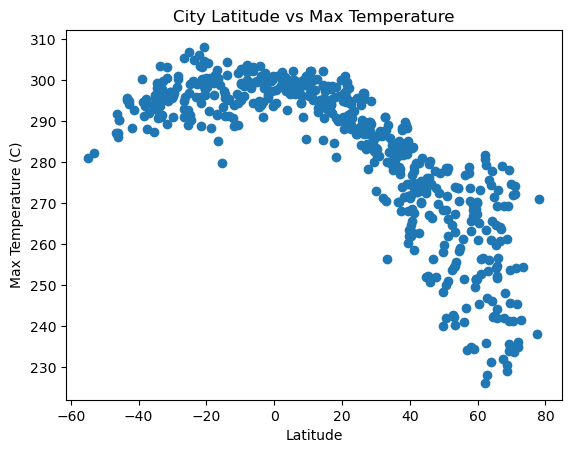

In [9]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]

# Incorporate the other graph properties
# YOUR CODE HERE
plt.scatter(x_values,y_values)
plt.title('City Latitude vs Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

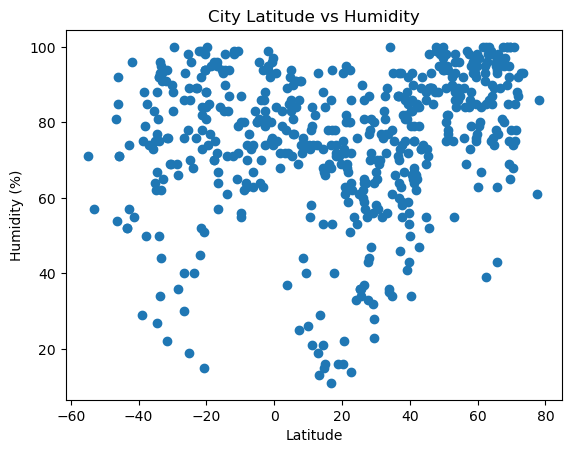

In [10]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
x_values = city_data_df["Lat"]
y_values = city_data_df["Humidity"]
# Incorporate the other graph properties
# YOUR CODE HERE
plt.scatter(x_values,y_values)
plt.title('City Latitude vs Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

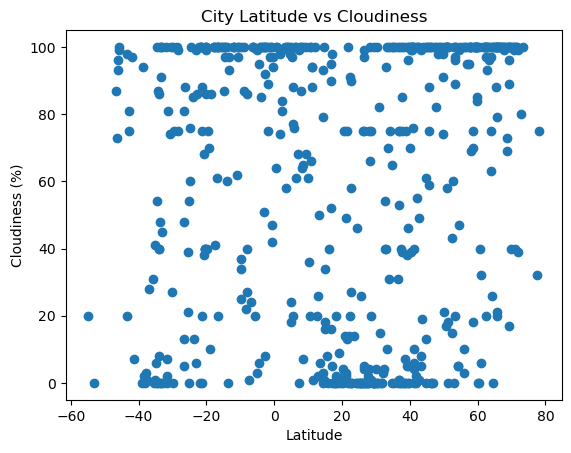

In [11]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
x_values = city_data_df["Lat"]
y_values = city_data_df["Cloudiness"]
# Incorporate the other graph properties
# YOUR CODE HERE
plt.scatter(x_values,y_values)
plt.title('City Latitude vs Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

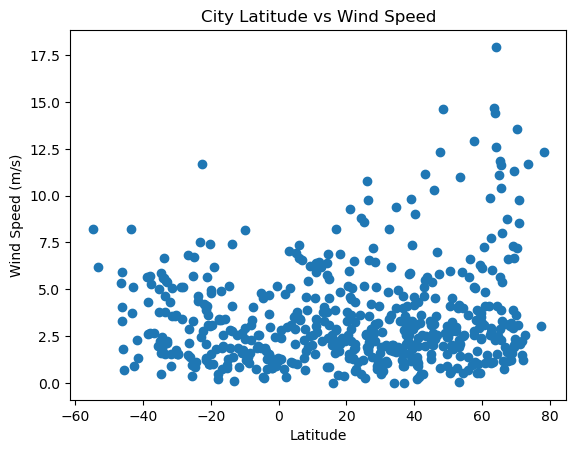

In [12]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed"]
# Incorporate the other graph properties
# YOUR CODE HERE
plt.scatter(x_values,y_values)
plt.title('City Latitude vs Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
def linear_reg(x, y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x,y)
    plt.annotate(line_eq,(min(x)+ 10, np.mean(y) - 10), xycoords='data',  fontsize=15,color="red")
    plt.plot(x,regress_values,"r-")
    plt.xlim(min(x)-10, max(x)+10)
    plt.ylim(min(y)-10, max(y)+10)
    print(f"R squared: {rvalue**2}")
    plt.show()

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >=0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hearst,49.6835,-83.6665,268.29,94,91,2.46,CA,1674356037
1,jamestown,42.0970,-79.2353,272.60,65,100,3.60,US,1674355993
3,sharan,54.8167,54.0000,259.02,87,100,2.58,RU,1674356038
6,solnechnyy,50.7214,136.6319,250.13,89,100,0.62,RU,1674356040
7,ayorou,14.7308,0.9174,295.50,15,100,3.11,NE,1674356041


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] <0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,mataura,-46.1927,168.8643,285.97,92,96,3.28,NZ,1674355914
4,bluff,-46.6000,168.3333,287.05,81,87,5.35,NZ,1674356038
5,nambucca heads,-30.6500,153.0000,297.15,69,74,3.55,AU,1674356039
14,ambilobe,-13.2000,49.0500,295.32,94,93,0.11,MG,1674356046
15,rikitea,-23.1203,-134.9692,299.14,76,99,7.55,PF,1674356047


###  Temperature vs. Latitude Linear Regression Plot

R squared: 0.7157209393930336


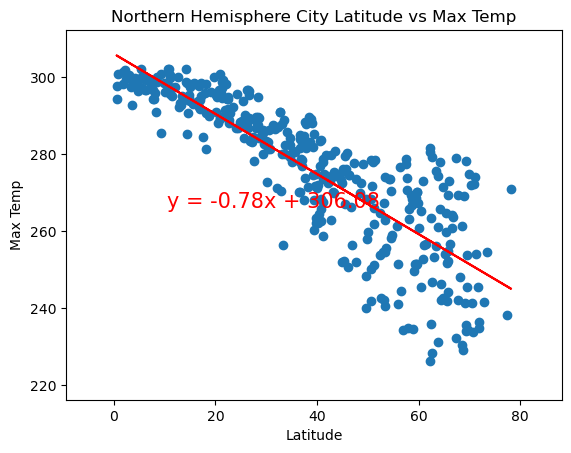

In [16]:
# Linear regression on Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Max Temp']
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Northern Hemisphere City Latitude vs Max Temp')
linear_reg(x, y)

R squared: 0.14893945130821987


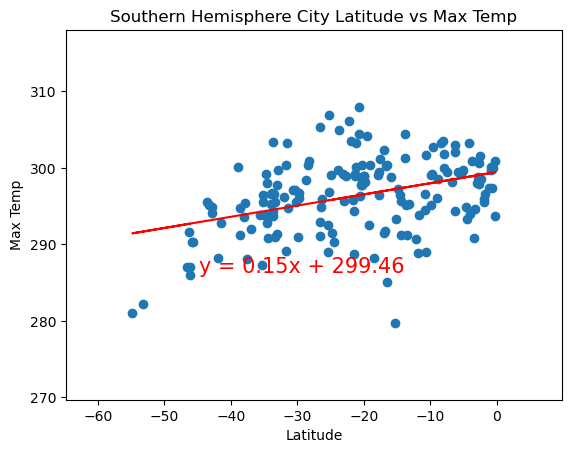

In [17]:
# Linear regression on Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Max Temp']
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Southern Hemisphere City Latitude vs Max Temp')
linear_reg(x, y)

**Discussion about the linear relationship:** Northern Hemisphere City Latitude and Max Temp have a strong relationship while Southern Hemisphere City Latitude and Max Temp have no relationship.

### Humidity vs. Latitude Linear Regression Plot

R squared: 0.1701049641579633


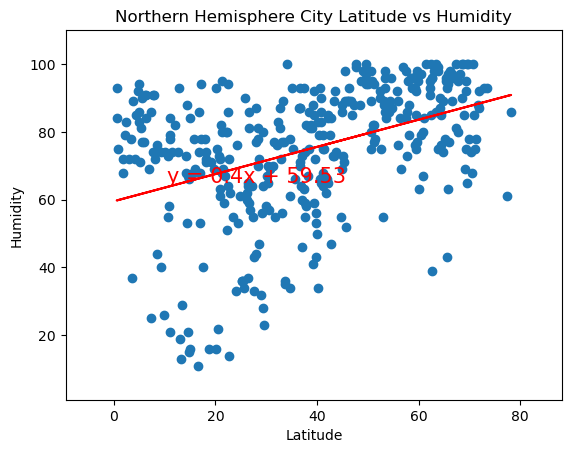

In [24]:
# Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Humidity']
plt.title('Northern Hemisphere City Latitude vs Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
linear_reg(x, y)


R squared: 0.04788970609220549


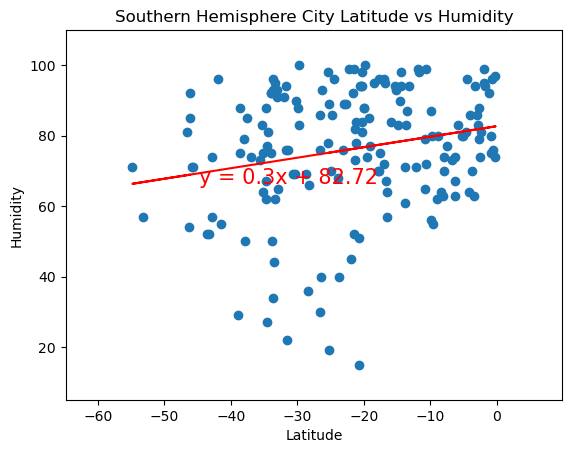

In [19]:
# Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Humidity']

plt.title('Southern Hemisphere City Latitude vs Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
linear_reg(x, y)


**Discussion about the linear relationship:** Both Northern and Southern Hemisphere have a very weak or no relationship between City Latitude vs Humidity. 

### Cloudiness vs. Latitude Linear Regression Plot

R squared: 0.08131544681259104


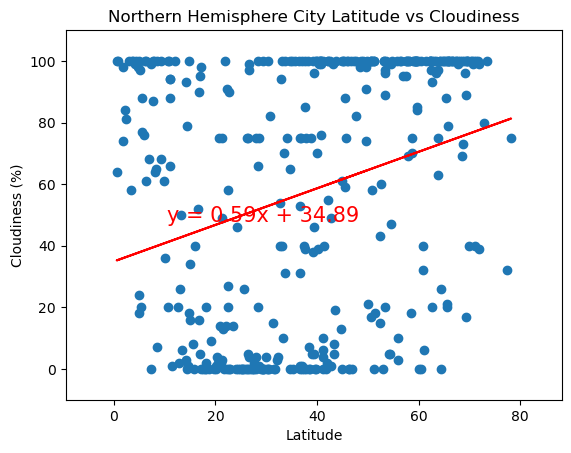

In [20]:
# Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Cloudiness']
plt.title('Northern Hemisphere City Latitude vs Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
linear_reg(x, y)

R squared: 0.07709616701820302


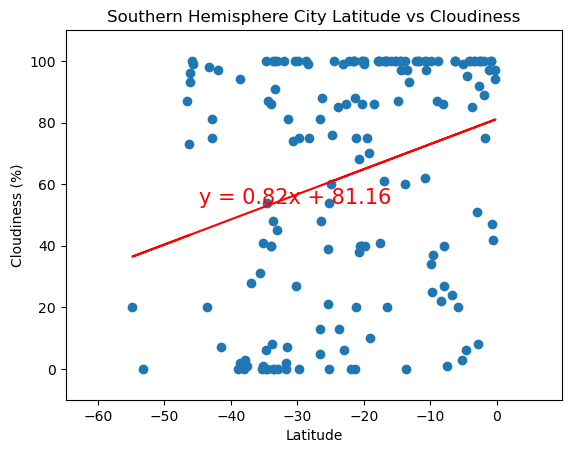

In [21]:
# Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Cloudiness']
plt.title('Southern Hemisphere City Latitude vs Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
linear_reg(x, y)

**Discussion about the linear relationship:** There are no relation between City Latitude and Cloudiness for both hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

R squared: 0.026773442879461325


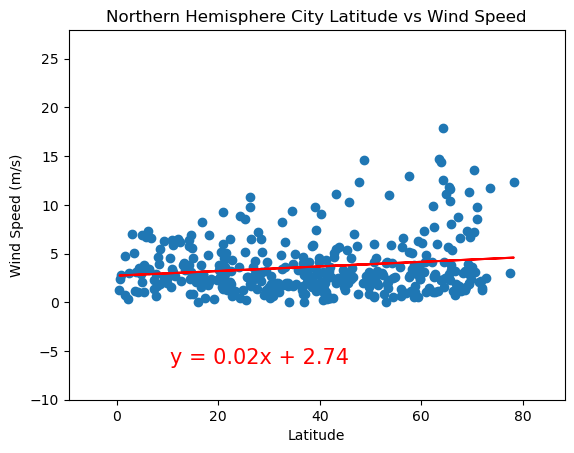

In [22]:
# Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Wind Speed']
plt.title('Northern Hemisphere City Latitude vs Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
linear_reg(x, y)

R squared: 0.10241600636794661


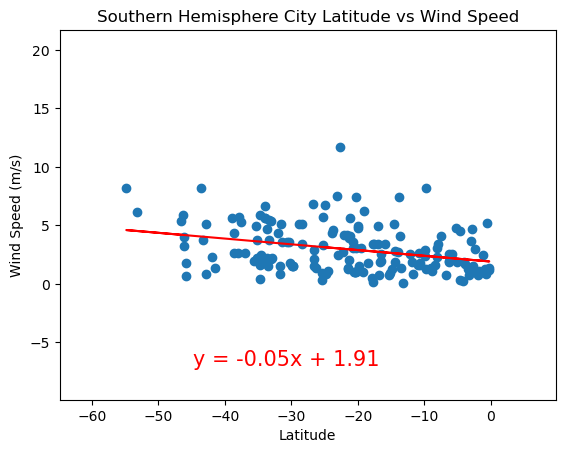

In [23]:
# Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Wind Speed']
plt.title('Southern Hemisphere City Latitude vs Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
linear_reg(x, y)


**Discussion about the linear relationship:** There are no relation between latitude and wind speed for both hemisphere.